# Hyperparameter Optimization For CNN Model

***
* #### Name               :`Namitha Menon Kakkanat`
* #### Student ID         :`2021117887`
* #### Course Name        :`MSc Artificial Intelligence & Data Science`
* #### Module Name        :`MSc Research Project (771764_A21_T3A)`
* #### Project Supervisor :`Dr.Kevin A Pimbblet`
* #### Dataset Name       :`GTSRB - German Traffic Sign Recognition Benchmark`  
* #### Dataset Link       :`https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign`
***

* **Importing Neccessary libraries required for the classifier**

In [11]:
import cv2
import os                                                          # To iterate over all the classes 
import pandas as pd
import numpy as np
import matplotlib as plt                                           # To visualize the graphs
import matplotlib.pyplot 
import matplotlib.image as mpimg
import tensorflow 
import PIL                                                         # To open image content into an array
from PIL import Image                                              # To represent PIL Image
from sklearn.model_selection import train_test_split               # To split dataset into test and train
from tensorflow.keras.utils import to_categorical                  # To convert the labels into one-hot encoding
import keras
from keras import optimizers
from keras.optimizers import adam_v2
from keras.models import Sequential                                # To arrange layers in sequential order
from keras.layers import Conv2D, MaxPool2D,Dropout,Dense, Flatten  # To create neural network
from sklearn.metrics import accuracy_score                         # To calculate the accuracy score
import visualkeras                                                 # To visualize Keras neural network architecture
import random                                                      
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data Preparation

* **Load Trained model**

In [9]:
from keras.models import load_model
model = load_model('Traffic_Sign_AI_Model.h5')

* **To store all images and their labels into lists**

In [12]:
data = []
labels = []
classes = 43
current_path = os.getcwd()                                            # To get current location path.

# Iterating through all classes to append images and labels to the data and labels list.
for i in range(classes):
    path = os.path.join(current_path,'Data_set\\train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)                    # To open the image from mentioned path.
            image = image.resize((30,30))                         # Image resize to default shape.
            image = np.array(image)
            data.append(image)                                    # To store all the images and their labels into lists (data and labels).
            labels.append(i)
        except:
            print("Error loading image")
            
data = np.array(data)                                             # Converting data list into numpy array for feeding into the model.
labels = np.array(labels)                                         # Converting labels list into numpy array for feeding into th model.
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [15]:
# Test & Train Split of dataset
x_train,x_test,y_train,y_test =train_test_split(data, labels,test_size=0.2,random_state=42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

# To convert all the labels present in y_train and y_test into one-hot encoding.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


***

# Hyperparameter Tunning - 1


**1. Learning rate : 0.00001**

**2. Epochs        : 20**


In [28]:
# Compilation of the model
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epochs = 20

# Training the model using model.fit()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
981/981 [==============================] - 69s 69ms/step - loss: 0.1874 - accuracy: 0.9456 - val_loss: 0.0425 - val_accuracy: 0.9876
Epoch 2/20
981/981 [==============================] - 69s 70ms/step - loss: 0.1296 - accuracy: 0.9617 - val_loss: 0.0362 - val_accuracy: 0.9895
Epoch 3/20
981/981 [==============================] - 70s 71ms/step - loss: 0.1193 - accuracy: 0.9648 - val_loss: 0.0335 - val_accuracy: 0.9904
Epoch 4/20
981/981 [==============================] - 68s 70ms/step - loss: 0.1128 - accuracy: 0.9673 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 5/20
981/981 [==============================] - 68s 69ms/step - loss: 0.1084 - accuracy: 0.9694 - val_loss: 0.0318 - val_accuracy: 0.9909
Epoch 6/20
981/981 [==============================] - 66s 67ms/step - loss: 0.1021 - accuracy: 0.9689 - val_loss: 0.0310 - val_accuracy: 0.9912
Epoch 7/20
981/981 [==============================] - 65s 66ms/step - loss: 0.1040 - accuracy: 0.9709 - val_loss: 0.0302 - val_accuracy:

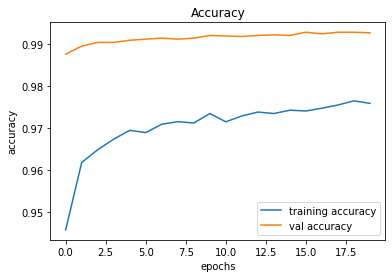

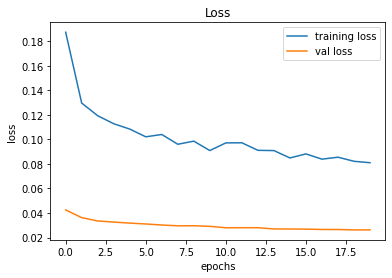

In [30]:
# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

***
# Hyperparameter Tunning - 2

**1. Learning rate : 0.002**

**2. Epochs        : 10**


Epoch 1/10
981/981 [==============================] - 72s 72ms/step - loss: 0.5109 - accuracy: 0.8769 - val_loss: 0.6117 - val_accuracy: 0.8351
Epoch 2/10
981/981 [==============================] - 70s 71ms/step - loss: 0.5220 - accuracy: 0.8657 - val_loss: 0.1064 - val_accuracy: 0.9709
Epoch 3/10
981/981 [==============================] - 76s 78ms/step - loss: 0.4381 - accuracy: 0.8860 - val_loss: 0.1651 - val_accuracy: 0.9535
Epoch 4/10
981/981 [==============================] - 71s 72ms/step - loss: 0.5081 - accuracy: 0.8720 - val_loss: 0.1227 - val_accuracy: 0.9652
Epoch 5/10
981/981 [==============================] - 68s 69ms/step - loss: 0.4955 - accuracy: 0.8709 - val_loss: 0.1545 - val_accuracy: 0.9521
Epoch 6/10
981/981 [==============================] - 64s 65ms/step - loss: 0.4975 - accuracy: 0.8710 - val_loss: 0.3060 - val_accuracy: 0.9119
Epoch 7/10
981/981 [==============================] - 74s 75ms/step - loss: 0.4809 - accuracy: 0.8794 - val_loss: 0.1072 - val_accuracy:

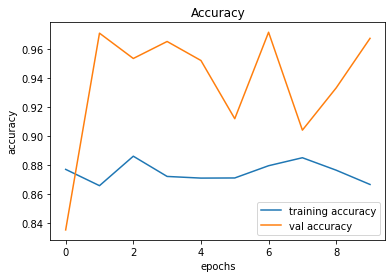

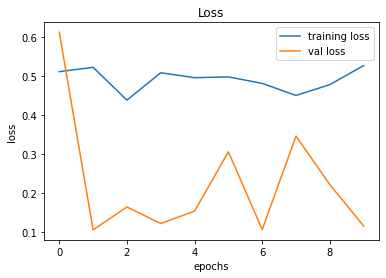

In [31]:
# Compilation of the model
adam = keras.optimizers.Adam(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epochs = 10

# Training the model using model.fit()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

***
# Hyperparameter Tunning - 3

**1. Learning rate : 0.0005**

**2. Epochs        : 20**


Epoch 1/20
981/981 [==============================] - 74s 75ms/step - loss: 0.2721 - accuracy: 0.9286 - val_loss: 0.0680 - val_accuracy: 0.9828
Epoch 2/20
981/981 [==============================] - 67s 68ms/step - loss: 0.2056 - accuracy: 0.9440 - val_loss: 0.0548 - val_accuracy: 0.9858
Epoch 3/20
981/981 [==============================] - 67s 69ms/step - loss: 0.1835 - accuracy: 0.9480 - val_loss: 0.0650 - val_accuracy: 0.9819
Epoch 4/20
981/981 [==============================] - 68s 70ms/step - loss: 0.1768 - accuracy: 0.9506 - val_loss: 0.0472 - val_accuracy: 0.9869
Epoch 5/20
981/981 [==============================] - 76s 78ms/step - loss: 0.1568 - accuracy: 0.9550 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 6/20
981/981 [==============================] - 69s 71ms/step - loss: 0.1542 - accuracy: 0.9563 - val_loss: 0.0514 - val_accuracy: 0.9857
Epoch 7/20
981/981 [==============================] - 67s 68ms/step - loss: 0.1422 - accuracy: 0.9585 - val_loss: 0.0469 - val_accuracy:

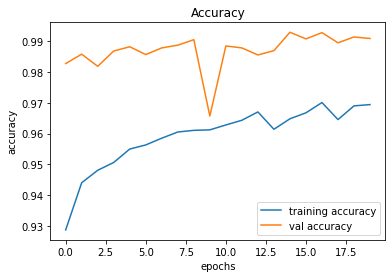

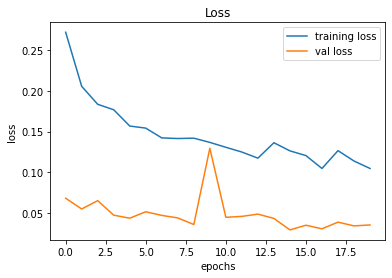

In [32]:
# Compilation of the model
adam = keras.optimizers.Adam(learning_rate= 0.0005)

# Training the model using model.fit()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epochs = 20
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

***
# Hyperparameter Tunning - 4

**1. Learning rate : 0.0001**

**2. Epochs        : 5**


Epoch 1/5
981/981 [==============================] - 73s 74ms/step - loss: 0.0630 - accuracy: 0.9820 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 2/5
981/981 [==============================] - 66s 68ms/step - loss: 0.0679 - accuracy: 0.9816 - val_loss: 0.0271 - val_accuracy: 0.9936
Epoch 3/5
981/981 [==============================] - 68s 70ms/step - loss: 0.0609 - accuracy: 0.9829 - val_loss: 0.0243 - val_accuracy: 0.9945
Epoch 4/5
981/981 [==============================] - 66s 67ms/step - loss: 0.0567 - accuracy: 0.9839 - val_loss: 0.0239 - val_accuracy: 0.9934
Epoch 5/5
981/981 [==============================] - 67s 68ms/step - loss: 0.0606 - accuracy: 0.9829 - val_loss: 0.0220 - val_accuracy: 0.9948


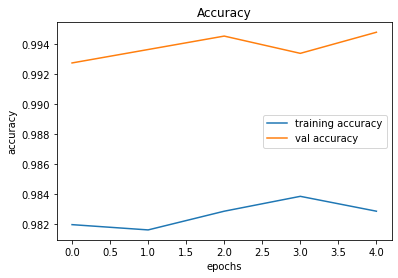

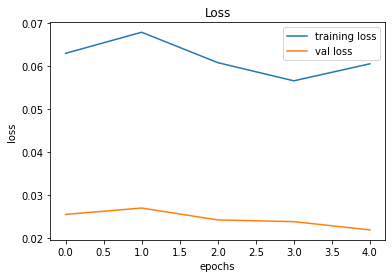

In [34]:
# Compilation of the model
adam = keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epochs = 5

# Training the model using model.fit()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

***
# Hyperparameter Tunning - 5

**1. Learning rate : 0.0001**

**2. Epochs        : 30**


Epoch 1/30
981/981 [==============================] - 70s 70ms/step - loss: 0.0605 - accuracy: 0.9834 - val_loss: 0.0243 - val_accuracy: 0.9944
Epoch 2/30
981/981 [==============================] - 68s 70ms/step - loss: 0.0580 - accuracy: 0.9830 - val_loss: 0.0230 - val_accuracy: 0.9939
Epoch 3/30
981/981 [==============================] - 66s 68ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0204 - val_accuracy: 0.9944
Epoch 4/30
981/981 [==============================] - 63s 64ms/step - loss: 0.0573 - accuracy: 0.9834 - val_loss: 0.0230 - val_accuracy: 0.9939
Epoch 5/30
981/981 [==============================] - 63s 64ms/step - loss: 0.0535 - accuracy: 0.9845 - val_loss: 0.0246 - val_accuracy: 0.9936
Epoch 6/30
981/981 [==============================] - 64s 65ms/step - loss: 0.0555 - accuracy: 0.9841 - val_loss: 0.0236 - val_accuracy: 0.9946
Epoch 7/30
981/981 [==============================] - 65s 66ms/step - loss: 0.0615 - accuracy: 0.9839 - val_loss: 0.0219 - val_accuracy:

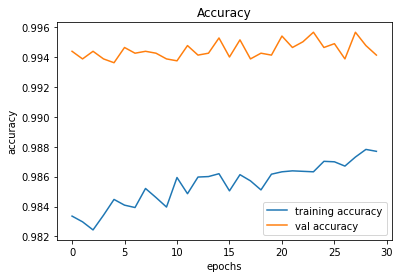

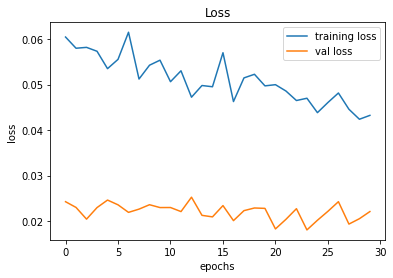

In [35]:
# Compilation of the model
adam = keras.optimizers.Adam(learning_rate= 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epochs = 30

# Training the model using model.fit()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()